<a href="https://colab.research.google.com/github/jadamcneill/music-computing/blob/main/assignments/labAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

# import audio files
!git clone https://github.com/jcdevaney/musicComputing2025.git

Cloning into 'musicComputing2025'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 180 (delta 34), reused 5 (delta 3), pack-reused 113 (from 1)
Receiving objects: 100% (180/180), 28.59 MiB | 8.16 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Updating files: 100% (28/28), done.


In [2]:
def plotAudio2(sig,sampleRate,title):


   # this version expects the audio file to have already been opened by librosa


   # Adjust the x-axis to represent time


   time=np.arange(0,sig.shape[0])/sr


   # Scale the y-axis to represent amplitude from -1 to 1
   excursion=max(abs(sig))
   sigNew = sig / excursion


   # Label the x and y axes with variables
   xlabel = 'Time (seconds)'
   ylabel = 'Amplitude'


   #plot the signal using the x and y axis variables
   plt.plot(time,sigNew)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   plt.title(title)
   plt.show()


    # this version expects the audio file to have already been opened by librosa



In [3]:
def subplots(plotPos,title,data,time,color,ylabel,xlabel):

    #plot the inputted data into the subplot specified in the list plotPos
    plt.subplot(plotPos[0],plotPos[1],plotPos[2])
    plt.title(title)
    plt.plot(time,data,color)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [4]:
def makeEchoes(sig,sr,sec,echoes):

    #calculate the number of bytes which corresponds to the offset in milliseconds
    offset=int(sr*sec)

    #add extra space at the end for the delays
    ending = np.zeros((offset*(len(echoes))))

    delayedSig = np.concatenate((sig,ending))

    for i in range(len(echoes)):

        #create some silence
        # python indexes starting with zero which is why you need to add one
        beginning = np.zeros(offset*(i+1))

        #create delayed version of signal
        delay = np.concatenate((beginning,sig))
        delay = delay * echoes[i]

        #pad the end of delay with zeros to make it the same length as delaysedSig
        delay = np.concatenate((delay,np.zeros((delayedSig.size-delay.size))))

        # combine with output signal
        delayedSig = delayedSig + delay

    return delayedSig

In [5]:
def amplitudeModulation(sig,modulatorFreq,modulatorAmp,modIndex):

    # create a time series from 0 to 1 the length of the inputted sig
    timeSeries = np.linspace(0, 1, len(sig))
    #create a cosine wave modulator with the time series using the inputted modulation frequency
    #with the np.cos function and multiple it by the inputted modulation amplitude
    modulator = modulatorAmp * np.cos (2 * np.pi * modulatorFreq * timeSeries)
    #perform amplitude modulation by multiplying the inputted sig with the modulator
    #(multiplied by 1 + modulation index)
    amMod = (1 + modIndex * modulator) * sig

    #create a time series to represent time for plotting
    time=np.arange(0,sig.shape[0])/sr

    #plot the modulator, the carrier (sig), and the result of the amplitude modulation (amMod)
    subplots([3,1,1],'Modulator signal',modulator,time,'g','Amplitude','Time')
    subplots([3,1,2],'Original (carrier) signal',sig,time,'r','Amplitude','Time')
    subplots([3,1,3],'Amplitude Modulated Signal',amMod,time,'purple','Amplitude','Time')

    plt.subplots_adjust(hspace=1)
    plt.rc('font', size=15)
    fig = plt.gcf()
    fig.set_size_inches(16, 9)

    return amMod

In [14]:
def echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex):

# create a function called echoAM() that inputs
#      - an audio signal
#      - the audio signal’s sampling rate
#      - a delay time (in seconds)
#      - a list containing the amplitude for the delays (# of delays specified by the length of the list)
#      - an amplitude modulation frequency
#      - an amplitude modulation amplitude
#      - a modulation index


  # plot the original signal in the time domain using plotAudio2()
  plotAudio2(sig,sr,'OriginalSignal')

  # use makeEchoes() to apply a delay according to the inputted values to the inputted signal
  delayedSig= makeEchoes(sig,sr,delay,echoes )



  # plot the delay in the time domain using plotAudio2()
  plotAudio2(delayedSig,sr,'delayedSig')


  # use amplitudeModulation() to apply amplitude modulation according to the inputted
  # to the delayed signal and to plot the Modulator Signal, Carrier Signal, and Product Signal
  # as subplots in a single plot
  amMod=amplitudeModulation(delayedSig,modulatorFreq,modulatorAmp,modIndex)


  # return the modified signal
  return amMod


In [9]:
# load original signal
sig , sr = librosa.load('musicComputing2025/audioFiles/avm.wav')
IPython.display.Audio(data=sig, rate=sr)

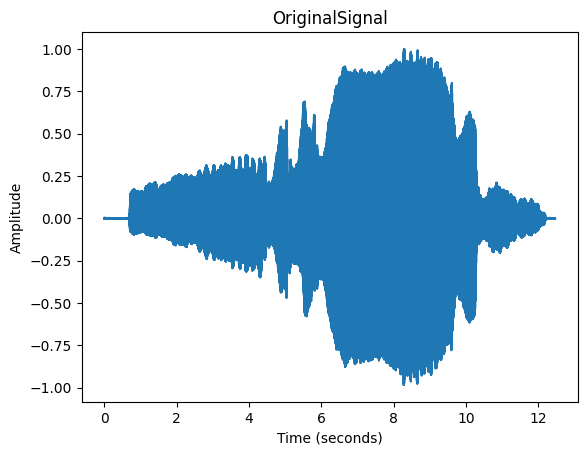

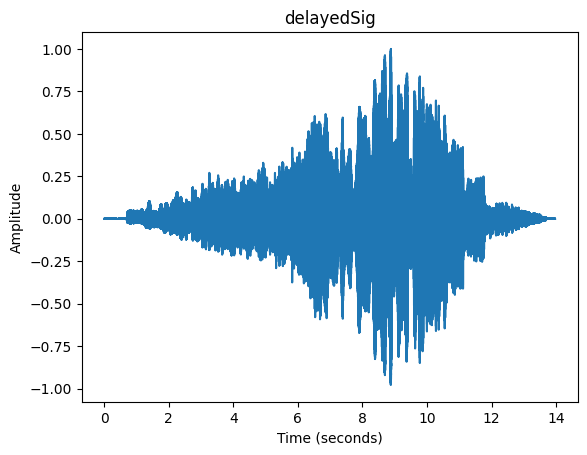

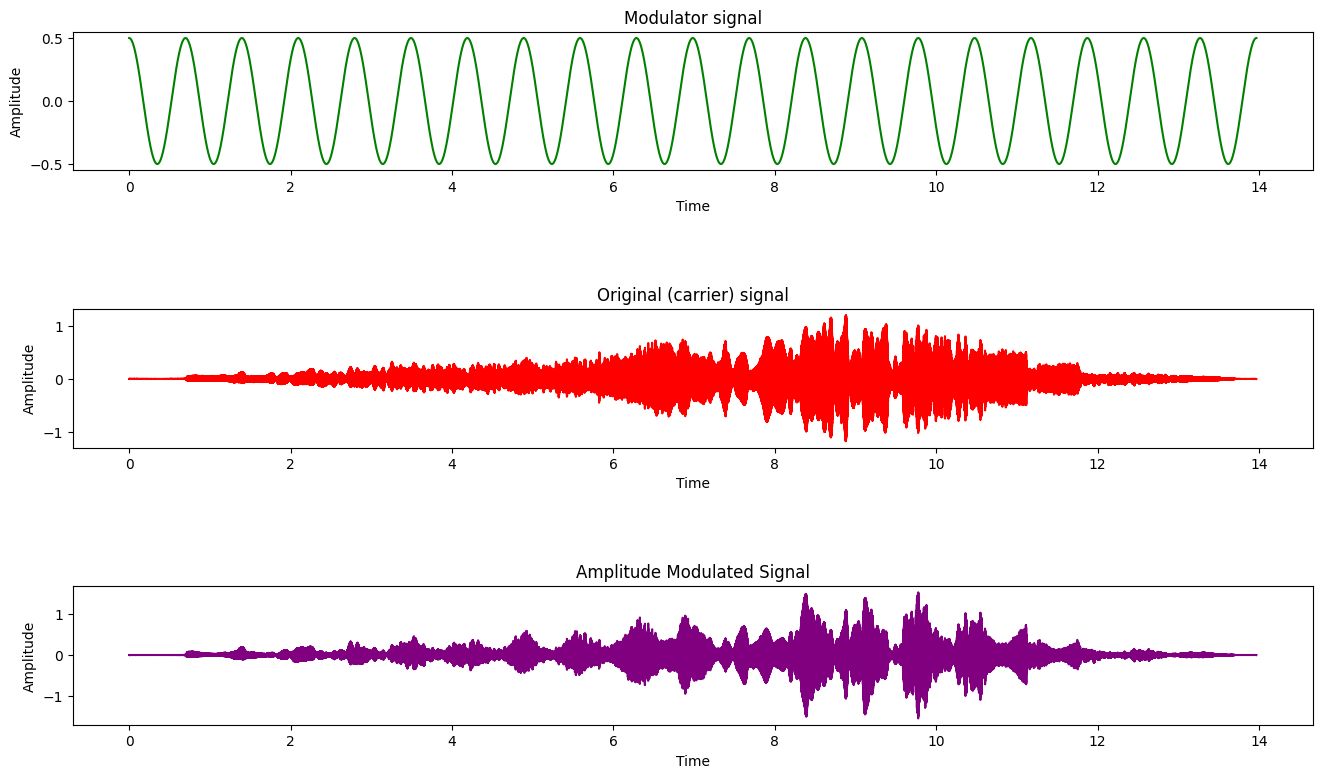

In [15]:
echoes = [1,1,1]
delay = 0.5
modulatorFreq = 20
modulatorAmp = 0.5
modIndex = 1

#echoAM(sig,sr,'Ave Maria')
modSignal1 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

IPython.display.Audio(data=modSignal1, rate=sr)

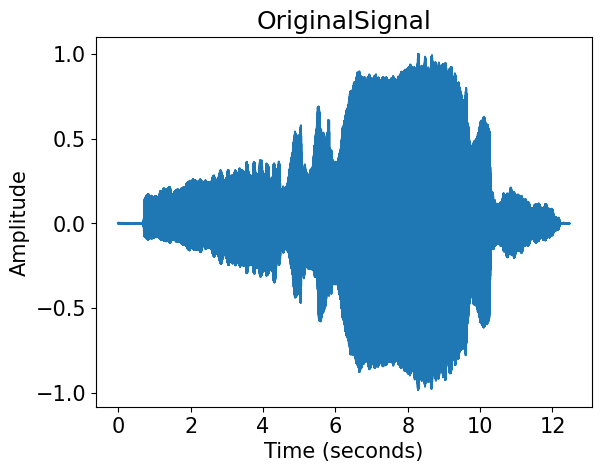

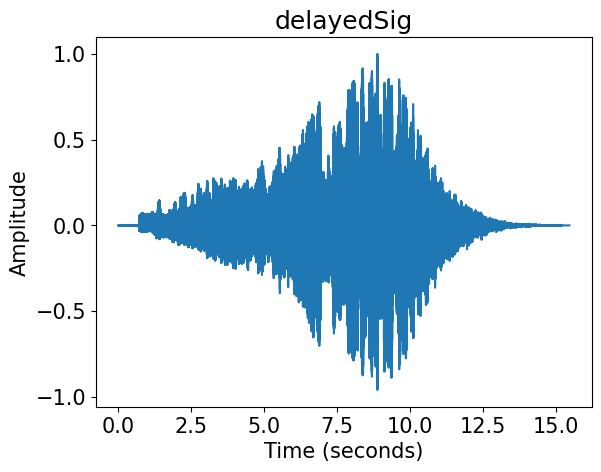

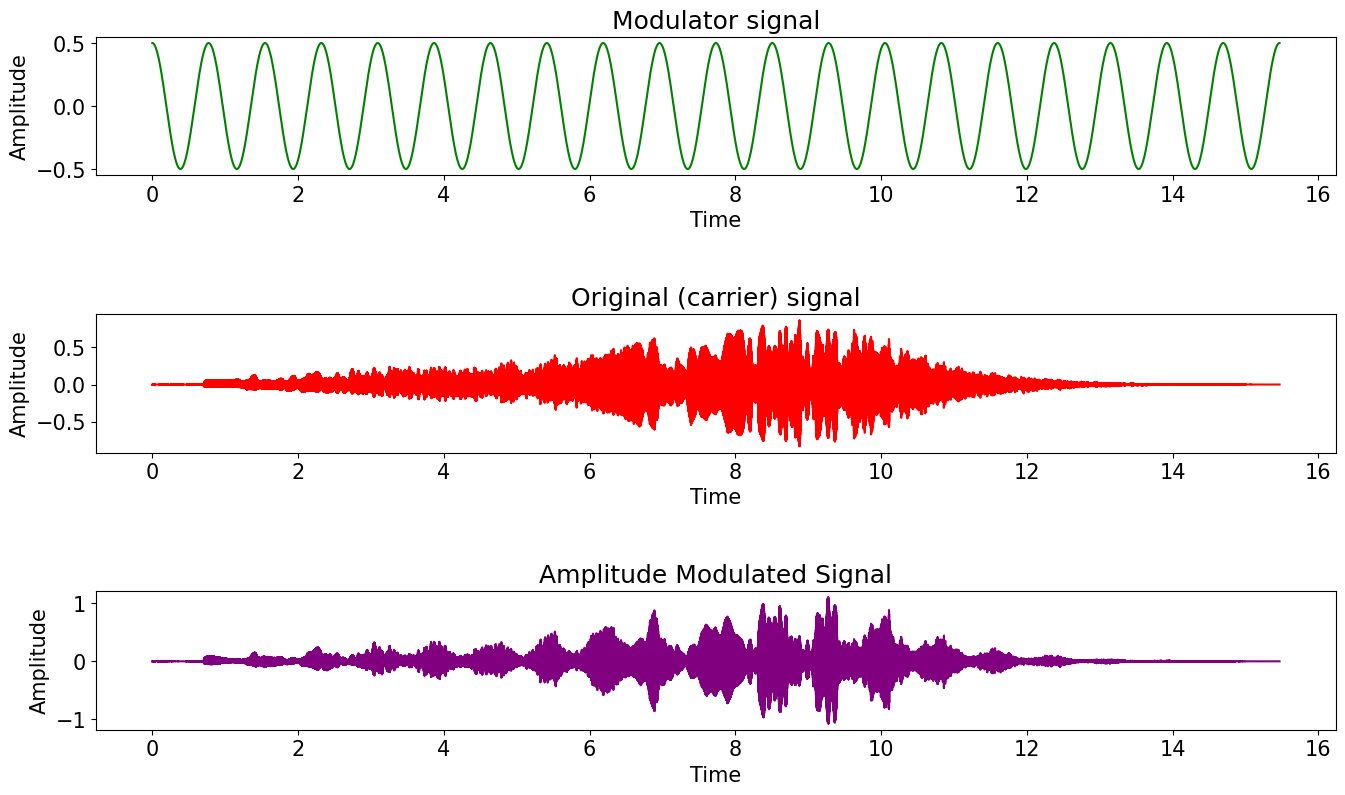

In [16]:
echoes = [1,0.5,0.25,0.125,0.0625,0.03125]
delay = 0.5
modulatorFreq = 20
modulatorAmp = 0.5
modIndex = 1

modSignal2 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

IPython.display.Audio(data=modSignal2, rate=sr)

In [ ]:
echoes = [1,1,1,1]
delay = 0.5
modulatorFreq = 200
modulatorAmp = 0.5
modIndex = 0.5

modSignal3 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

IPython.display.Audio(data=modSignal3, rate=sr)

In [ ]:
echoes = [1,0.5,0.25,0.125,0.0625,0.03125]
delay = 0.5
modulatorFreq = 200
modulatorAmp = 0.5
modIndex = 0.5

modSignal4 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

IPython.display.Audio(data=modSignal4, rate=sr)